In [3]:
'''

+-------------------------------+
|                               |
|    I M P O R T   M O D E L    | 
|                               |
+-------------------------------+

Description

Creaged on Thu Aug 8 15:54 2022

@author: Xingyu Wu
'''

# --------------------------
# Importing public libraries
# --------------------------

# Operating system specific functions
import os

# Argument parser, for configuring the program execution
import argparse

# An object oriented library for handling EPANET files in Python
import epynet 

# yaml / yml configuration file support (a kind of language) 
# pip install pyyaml
import yaml

# PyTorch deep learning framework
import torch

# Import the networkx library
import networkx as nx

# Import Pandas for data handling
import pandas as pd

# Import numpy for array handling
import numpy as np

# Matplotlib for generating graphics
import matplotlib.pyplot as plt

# PyTorch from graph conversion tool
from torch_geometric.utils import from_networkx

# conda install pytorch-sparse -c pyg

# Train-test split with shuffle 
from sklearn.model_selection import train_test_split

import sys

/home/zczlx79/.conda/envs/pytorch/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1. Correlation between leaking pipe diameter and its own pipe diameter

### 1.1 loading leaking pipe information

In [4]:
config_path = './data/dataset_configuration.yaml'
try:
    with open(config_path,'r') as f:
        print('f', f)
        leak_pipes = yaml.load(f.read(),Loader=yaml.FullLoader)
except:
    print('"dataset_configuration" file not found.')
    sys.exit()

f <_io.TextIOWrapper name='./data/dataset_configuration.yaml' mode='r' encoding='UTF-8'>


In [5]:
leakages = leak_pipes['leakages']
leakages = leakages[1:]
df_leakage = pd.DataFrame(leakages)
column_names = {0:'linkID', 1:'startTime', 2:'endTime', 3:'leakDiameter (m)', 4:'leakType', 5:'peakTime'}
df_leakage = pd.concat([df_leakage.iloc[:, 0].str.split(', ', expand=True)], axis=1)
df_leakage.rename(columns = column_names, inplace = True)
df_leakage

,linkID,startTime,endTime,leakDiameter (m),leakType,peakTime
0,p257,2018-01-08 13:30,2019-12-31 23:55,0.011843,incipient,2018-01-25 08:30
1,p461,2018-01-23 04:25,2018-04-02 11:40,0.021320,incipient,2018-03-27 20:35
2,p232,2018-01-31 02:35,2018-02-10 09:20,0.020108,incipient,2018-02-03 16:05
3,p427,2018-02-13 08:25,2019-12-31 23:55,0.0090731,incipient,2018-05-14 19:25
4,p673,2018-03-05 15:45,2018-03-23 10:25,0.022916,abrupt,2018-03-05 15:45
5,p810,2018-07-28 03:05,2019-12-31 23:55,0.010028,incipient,2018-11-02 22:25
6,p628,2018-05-02 14:55,2018-05-29 21:20,0.022318,incipient,2018-05-16 08:00
7,p538,2018-05-18 08:35,2018-06-02 06:05,0.021731,abrupt,2018-05-18 08:35
8,p866,2018-06-01 09:05,2018-06-12 03:00,0.018108,abrupt,2018-06-01 09:05
9,p31,2018-06-28 10:35,2018-08-12 17:30,0.016389,incipient,2018-08-03 02:45


In [53]:
leakDiameter = df_leakage['leakDiameter (m)'].to_list()
leakDiameter = list(map(float, leakDiameter))
len(leakDiameter)

33

### 1.2 loading pipe diameter from .inp model

In [6]:
path_to_wdn = './data/L-TOWN_Real.inp' # Do I need to distinguish between REAL and NOMINAL EPANET inps here?

In [7]:
# Import the .inp file using the EPYNET library
wdn = epynet.Network(path_to_wdn)

# Solve hydraulic model for a single timestep
wdn.solve()

In [29]:
wdn.pipes['p1'].diameter

198.6771

In [35]:
pipeDiameter = []
for i in range(len(leakDiameter)):
    pipe_name = df_leakage['linkID'][i]
    pipeDiameter.append(wdn.pipes[pipe_name].diameter)
len(pipeDiameter)
    

33

### 1.3 scatter plot and correlation

plot scatter plots of leaking diameters and pipe diameters


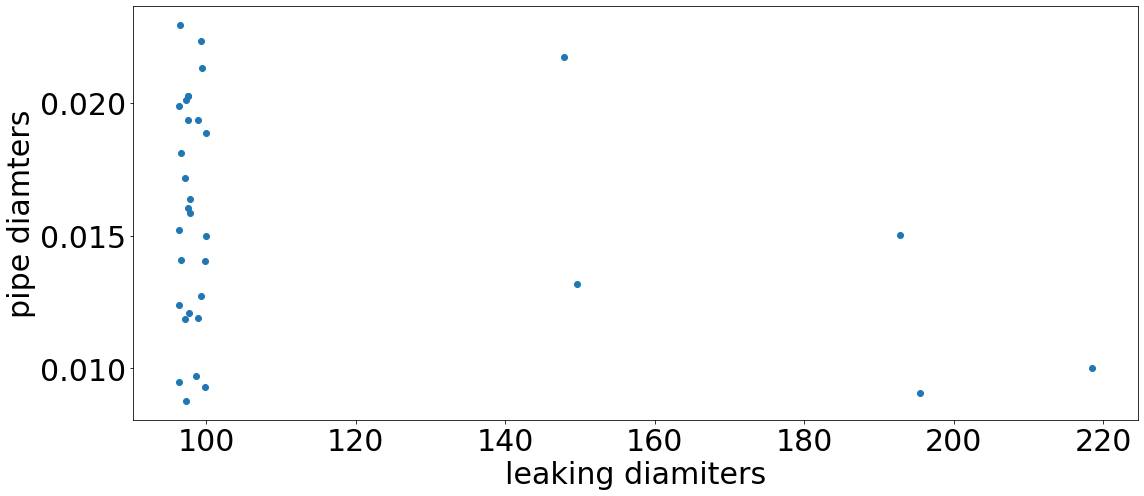

In [56]:
# plot scatter plots of AAPL Close and two kinds of share indexes.
print('plot scatter plots of leaking diameters and pipe diameters')
fig, (ax1) = plt.subplots(1, 1, figsize=(16, 7))
ax1.scatter(pipeDiameter, leakDiameter)
ax1.set_xlabel(r'leaking diamiters', fontsize=30)
ax1.set_ylabel(r'pipe diamters', fontsize=30)
ax1.tick_params(labelsize=30)
plt.tight_layout()
# plt.savefig("./image/scatter.pdf")

In [59]:
np.corrcoef(leakDiameter, pipeDiameter) # pearsonr correlation matrix

array([[ 1.        , -0.26293334],
       [-0.26293334,  1.        ]])

相关系数＜0.4被认为相关性比较弱。

从线性和非线性相关系数来看，基本上没有相关性。

p值(不相关的概率) > 0.05, 没有理由认为显著性差异存在，即没有相关性。

In [58]:
from scipy.stats import pearsonr, spearmanr
print('linear correlation:', pearsonr(leakDiameter, pipeDiameter))
print('non-linear correlation:', spearmanr(leakDiameter, pipeDiameter))

linear correlation: (-0.26293334250121564, 0.13931368648100997)
non-linear correlation: SpearmanrResult(correlation=-0.13302139037433156, pvalue=0.4605299531844579)
